<a href="https://colab.research.google.com/github/shcho11/00.ML_Practices_School_2022/blob/main/Modeling_WalmartSalesForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Description**
- 2022-1학기 빅데이터분석을위한프로그래밍 수업 제출 개인과제
- 본 과제에서는 **시각화 툴을 동반한 탐색적 데이터분석(EDA)과 데이터전처리 과정에 중점을 두고 모델링**을 진행하였습니다.
- matplotlib,seaborn과 더불어 google maps의 geocoding정보를 활용한 folium 라이브러리를 사용하였습니다.
- 데이터셋은 '기계학습' 수업 팀과제 당시 준비하였던 'Walmart Sales Forecast'를 사용하였습니다. Kaggle에서 제공하는 기본 Feature에, 각 익명점포의 추정 소재지를 반영하여 생성한 각 주별 임금 및 GDP Feature, 전미 경제지표(Retail ETF Price, 10년물 국채금리) Feature를 추가 반영하여 월마트 점포별 weekly 매출액을 예측하기 위한 과제입니다. 
- 아래 모든 마크다운과 주석 텍스트는 영문으로 작성하였습니다.

## **Load Libraries/Modules**

In [ ]:
# import some essential libraries/modules first

import numpy as np
import pandas as pd
import sys
assert sys.version_info >= (3, 5)
import os 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import json
import itertools

In [ ]:
!pip install googlemaps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for googlemaps: filename=googlemaps-4.6.0-py3-none-any.whl size=38554 sha256=7be799ac1a26dcf705020f9d8fc2ec2118ff3def5d468a79b9a651e2f6f05a8b
  Stored in directory: /root/.cache/pip/wheels/80/db/c0/6d958585fa97b20e250bf437acf7e6e715b4809c2dd4e55367
Successfully built googlemaps


In [ ]:
import googlemaps

## **Load Dataset**

In [ ]:
os.getcwd()

'/content'

In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
ls -a

In [ ]:
dataset = pd.read_csv('walmart_sales.csv' )
dataset.head()

,Store,City,State,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,S&P_Retail_ETF,10y_Treasury,Type,Size,WeekIncome,StateGDP
0,1,Rogers,Arkansas,2010-02-05,1643690.90,False,42.31,2.572,211.0964,8.106,17.35,3.546,A,151315,826.0124,126502.5
1,2,Benton,Arkansas,2010-02-05,2136989.46,False,40.19,2.572,210.7526,8.324,17.35,3.546,A,202307,826.0124,126502.5
2,3,Pearsall,Texas,2010-02-05,461622.22,False,45.71,2.572,214.4249,7.368,17.35,3.546,B,37392,999.5517,1450610.0
3,4,Savoy,Illinois,2010-02-05,2135143.87,False,43.76,2.598,126.4421,8.623,17.35,3.546,A,205863,1056.4290,853147.0
4,5,Livingston,Alabama,2010-02-05,317173.10,False,39.70,2.572,211.6540,6.566,17.35,3.546,B,34875,925.6007,224564.6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store           6435 non-null   int64  
 1   City            6435 non-null   object 
 2   State           6435 non-null   object 
 3   Date            6435 non-null   object 
 4   Weekly_Sales    6435 non-null   float64
 5   Holiday_Flag    6435 non-null   bool   
 6   Temperature     6435 non-null   float64
 7   Fuel_Price      6435 non-null   float64
 8   CPI             6435 non-null   float64
 9   Unemployment    6435 non-null   float64
 10  S&P_Retail_ETF  6255 non-null   float64
 11  10y_Treasury    6255 non-null   float64
 12  Type            6435 non-null   object 
 13  Size            6435 non-null   int64  
 14  WeekIncome      6435 non-null   float64
 15  StateGDP        6435 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(4)
memory usage: 760.5+ KB


In [ ]:
dataset.describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,S&P_Retail_ETF,10y_Treasury,Size,WeekIncome,StateGDP
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6255.000000,6255.000000,6435.000000,6435.000000,6.435000e+03
mean,23.000000,1.046965e+06,60.663782,3.358607,171.578394,7.999151,25.059424,2.585942,130287.600000,993.843624,6.569796e+05
std,12.988182,5.643666e+05,18.444933,0.459020,39.356712,1.875885,4.044984,0.714613,63117.022465,101.334404,5.730296e+05
min,1.000000,2.099862e+05,-2.060000,2.472000,126.064000,3.879000,17.350000,1.460000,34875.000000,780.945900,3.475555e+04
25%,12.000000,5.533501e+05,47.460000,2.933000,131.735000,6.891000,21.690000,1.949000,70713.000000,926.442150,2.070114e+05
50%,23.000000,9.607460e+05,62.670000,3.445000,182.616500,7.874000,25.060000,2.612000,126512.000000,984.130000,4.077400e+05
75%,34.000000,1.420159e+06,74.940000,3.735000,212.743300,8.622000,28.640000,3.223000,202307.000000,1046.265000,7.839541e+05
max,45.000000,3.818686e+06,100.140000,4.468000,227.232800,14.313000,32.570000,3.888000,219622.000000,1262.044000,2.554491e+06


In [ ]:
# place the label column(Weekly_Sales) into the last order
col_list = dataset.columns.tolist()
new_col_list = col_list[0:4] + col_list[5:] + col_list[4:5]

dataset = dataset[new_col_list]
dataset.head(3)

,Store,City,State,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,S&P_Retail_ETF,10y_Treasury,Type,Size,WeekIncome,StateGDP,Weekly_Sales
0,1,Rogers,Arkansas,2010-02-05,False,42.31,2.572,211.0964,8.106,17.35,3.546,A,151315,826.0124,126502.5,1643690.90
1,2,Benton,Arkansas,2010-02-05,False,40.19,2.572,210.7526,8.324,17.35,3.546,A,202307,826.0124,126502.5,2136989.46
2,3,Pearsall,Texas,2010-02-05,False,45.71,2.572,214.4249,7.368,17.35,3.546,B,37392,999.5517,1450610.0,461622.22


## **EDA & Preprocessing**

### 1) Handling NaN values
- replacing NaN values with time-seires interpolatory numbers

In [ ]:
print("Columns with NaNs : ", dataset.columns[dataset.isnull().any()].tolist())

Columns with NaNs :  ['S&P_Retail_ETF', '10y_Treasury']


In [ ]:
print(dataset[['S&P_Retail_ETF', '10y_Treasury']].isnull().sum())

S&P_Retail_ETF    180
10y_Treasury      180
dtype: int64


In [ ]:
dataset.loc[(dataset['S&P_Retail_ETF'].isnull()) | 
            (dataset['10y_Treasury'].isnull())].head(3)

,Store,City,State,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,S&P_Retail_ETF,10y_Treasury,Type,Size,WeekIncome,StateGDP,Weekly_Sales
360,1,Rogers,Arkansas,2010-04-02,False,62.27,2.719,210.8204,7.808,NaN,NaN,A,151315,833.077,129869.8,1594968.28
361,2,Benton,Arkansas,2010-04-02,False,63.27,2.719,210.4799,8.200,NaN,NaN,A,202307,833.077,129869.8,2066187.72
362,3,Pearsall,Texas,2010-04-02,False,65.56,2.719,214.1181,7.343,NaN,NaN,B,37392,1014.081,1457746.0,423294.40


In [ ]:
# creating a temporary table

dataset_nan = dataset.loc[:,['Date','S&P_Retail_ETF','10y_Treasury']]
dataset_nan['Date'] = pd.to_datetime(dataset_nan['Date'])
dataset_nan.head(3)

,Date,S&P_Retail_ETF,10y_Treasury
0,2010-02-05,17.35,3.546
1,2010-02-05,17.35,3.546
2,2010-02-05,17.35,3.546


In [ ]:
dataset_nan.set_index('Date', inplace=True)
dataset_nan.rename(columns={'S&P_Retail_ETF':'ETF', '10y_Treasury':'Treasury'}, inplace=True)
dataset_nan.head(3)

,ETF,Treasury
Date,,
2010-02-05,17.35,3.546
2010-02-05,17.35,3.546
2010-02-05,17.35,3.546


In [ ]:
# time-series interpolation
dataset_nan['ETF'].interpolate(method='time', inplace=True)
dataset_nan['Treasury'].interpolate(method='time', inplace=True)

In [ ]:
dataset_nan.reset_index(inplace=True)
dataset_nan.drop(columns='Date', inplace=True)
dataset_nan.head(3)

,ETF,Treasury
0,17.35,3.546
1,17.35,3.546
2,17.35,3.546


In [ ]:
# insert interpolated columns to original dataset

dataset1 = pd.concat([dataset, dataset_nan], axis=1)
dataset1.drop(columns=['S&P_Retail_ETF','10y_Treasury'])

col_list1 = dataset1.columns.tolist()
new_col_list1 = col_list1[0:9] + col_list1[16:] + col_list1[11:16]
dataset1 = dataset1[new_col_list1]

dataset1.head(3)

,Store,City,State,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ETF,Treasury,Type,Size,WeekIncome,StateGDP,Weekly_Sales
0,1,Rogers,Arkansas,2010-02-05,False,42.31,2.572,211.0964,8.106,17.35,3.546,A,151315,826.0124,126502.5,1643690.90
1,2,Benton,Arkansas,2010-02-05,False,40.19,2.572,210.7526,8.324,17.35,3.546,A,202307,826.0124,126502.5,2136989.46
2,3,Pearsall,Texas,2010-02-05,False,45.71,2.572,214.4249,7.368,17.35,3.546,B,37392,999.5517,1450610.0,461622.22


In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   City          6435 non-null   object 
 2   State         6435 non-null   object 
 3   Date          6435 non-null   object 
 4   Holiday_Flag  6435 non-null   bool   
 5   Temperature   6435 non-null   float64
 6   Fuel_Price    6435 non-null   float64
 7   CPI           6435 non-null   float64
 8   Unemployment  6435 non-null   float64
 9   ETF           6435 non-null   float64
 10  Treasury      6435 non-null   float64
 11  Type          6435 non-null   object 
 12  Size          6435 non-null   int64  
 13  WeekIncome    6435 non-null   float64
 14  StateGDP      6435 non-null   float64
 15  Weekly_Sales  6435 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(4)
memory usage: 760.5+ KB


In [ ]:
# I can see that ETF Price and Treasury yield in Arkansas on 2010-04-02 have been replaced with Interpolated numbers 

dataset1.loc[(dataset['State'] == 'Arkansas') & 
             (dataset['Date'] > '2010-03-20')].head()

,Store,City,State,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ETF,Treasury,Type,Size,WeekIncome,StateGDP,Weekly_Sales
315,1,Rogers,Arkansas,2010-03-26,False,51.45,2.732,211.0180,8.106,20.810,3.8550,A,151315,827.4433,126502.5,1404429.92
316,2,Benton,Arkansas,2010-03-26,False,51.26,2.732,210.6766,8.324,20.810,3.8550,A,202307,827.4433,126502.5,1750197.81
360,1,Rogers,Arkansas,2010-04-02,False,62.27,2.719,210.8204,7.808,21.105,3.8715,A,151315,833.0770,129869.8,1594968.28
361,2,Benton,Arkansas,2010-04-02,False,63.27,2.719,210.4799,8.200,21.105,3.8715,A,202307,833.0770,129869.8,2066187.72
405,1,Rogers,Arkansas,2010-04-09,False,65.86,2.770,210.6229,7.808,21.400,3.8880,A,151315,833.0770,129869.8,1545418.53


### 2) bool to int type

In [ ]:
dataset1['Holiday_Flag'].value_counts()

False    5985
True      450
Name: Holiday_Flag, dtype: int64

In [ ]:
dataset1['Holiday_Flag'] = dataset1['Holiday_Flag'].astype(int)

In [ ]:
dataset1['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [ ]:
dataset1.head(3)

,Store,City,State,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ETF,Treasury,Type,Size,WeekIncome,StateGDP,Weekly_Sales
0,1,Rogers,Arkansas,2010-02-05,0,42.31,2.572,211.0964,8.106,17.35,3.546,A,151315,826.0124,126502.5,1643690.90
1,2,Benton,Arkansas,2010-02-05,0,40.19,2.572,210.7526,8.324,17.35,3.546,A,202307,826.0124,126502.5,2136989.46
2,3,Pearsall,Texas,2010-02-05,0,45.71,2.572,214.4249,7.368,17.35,3.546,B,37392,999.5517,1450610.0,461622.22


### 3) Extracting Year and Month from Datetime

In [ ]:
dataset1['Year'] = pd.DatetimeIndex(dataset1['Date']).year
dataset1['Month'] = pd.DatetimeIndex(dataset1['Date']).month

In [ ]:
dataset1 = dataset1[['Store','City','State','Year','Month','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','ETF','Treasury','Type','Size','WeekIncome','StateGDP','Weekly_Sales']]
dataset1.head(3)

,Store,City,State,Year,Month,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ETF,Treasury,Type,Size,WeekIncome,StateGDP,Weekly_Sales
0,1,Rogers,Arkansas,2010,2,0,42.31,2.572,211.0964,8.106,17.35,3.546,A,151315,826.0124,126502.5,1643690.90
1,2,Benton,Arkansas,2010,2,0,40.19,2.572,210.7526,8.324,17.35,3.546,A,202307,826.0124,126502.5,2136989.46
2,3,Pearsall,Texas,2010,2,0,45.71,2.572,214.4249,7.368,17.35,3.546,B,37392,999.5517,1450610.0,461622.22


### 4) dealing with multi-colinearity

In [ ]:
# correlation among the variables 
corr = dataset1.corr()
corr

,Store,Year,Month,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ETF,Treasury,Size,WeekIncome,StateGDP,Weekly_Sales
Store,1.000000e+00,-7.775798e-15,3.310988e-16,1.323199e-16,-0.022659,0.060023,-0.209492,0.223531,2.816237e-15,-2.119638e-15,-2.442698e-01,0.061899,-0.027344,-0.335332
Year,-7.775798e-15,1.000000e+00,-1.944645e-01,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,9.208742e-01,-7.362339e-01,1.475612e-15,-0.077977,0.021729,-0.018378
Month,3.310988e-16,-1.944645e-01,1.000000e+00,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,9.330149e-03,-3.558435e-01,3.696846e-16,0.009163,0.003410,0.076143
Holiday_Flag,1.323199e-16,-5.678257e-02,1.229958e-01,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-4.341195e-02,-1.276043e-02,1.191058e-16,0.007446,-0.000631,0.036891
Temperature,-2.265908e-02,6.426923e-02,2.358618e-01,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,4.191148e-02,-2.598663e-01,-9.248017e-02,-0.178120,0.055482,-0.063810
Fuel_Price,6.002295e-02,7.794703e-01,-4.215590e-02,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,7.991882e-01,-5.095451e-01,9.053225e-03,-0.094923,-0.049340,0.009464
CPI,-2.094919e-01,7.479572e-02,4.979654e-03,-2.162085e-03,0.176888,-0.170642,1.000000,-0.302020,7.235172e-02,-6.717320e-02,-9.737313e-03,-0.134427,0.222294,-0.072634
Unemployment,2.235313e-01,-2.418135e-01,-1.274559e-02,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-2.323045e-01,2.182967e-01,-8.917014e-02,-0.147587,-0.158388,-0.106176
ETF,2.816237e-15,9.208742e-01,9.330149e-03,-4.341195e-02,0.041911,0.799188,0.072352,-0.232304,1.000000e+00,-6.715391e-01,-3.275384e-16,-0.072535,0.021555,0.004648
Treasury,-2.119638e-15,-7.362339e-01,-3.558435e-01,-1.276043e-02,-0.259866,-0.509545,-0.067173,0.218297,-6.715391e-01,1.000000e+00,-2.033352e-16,0.060306,-0.020729,-0.008531


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Text(0.5, 1.0, 'Correlation among the variables')

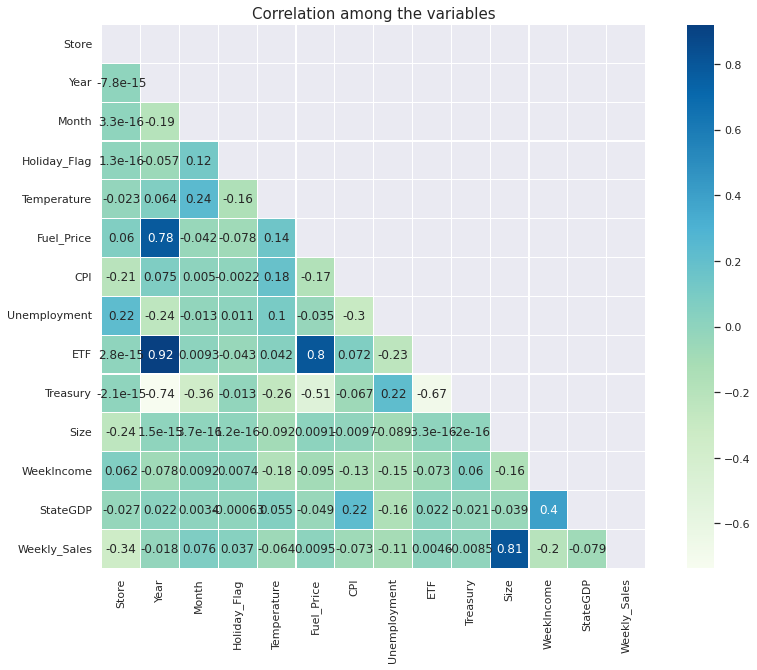

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
mask = np.zeros_like(corr, dtype=np.bool) # to plot only part of a matrix
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            annot = True, # write the value in each cell
            cmap = 'GnBu',
            square = True, # set the axes aspect to "equal"
            mask = mask,
            linewidths=0.2)
plt.title('Correlation among the variables', fontsize=15)

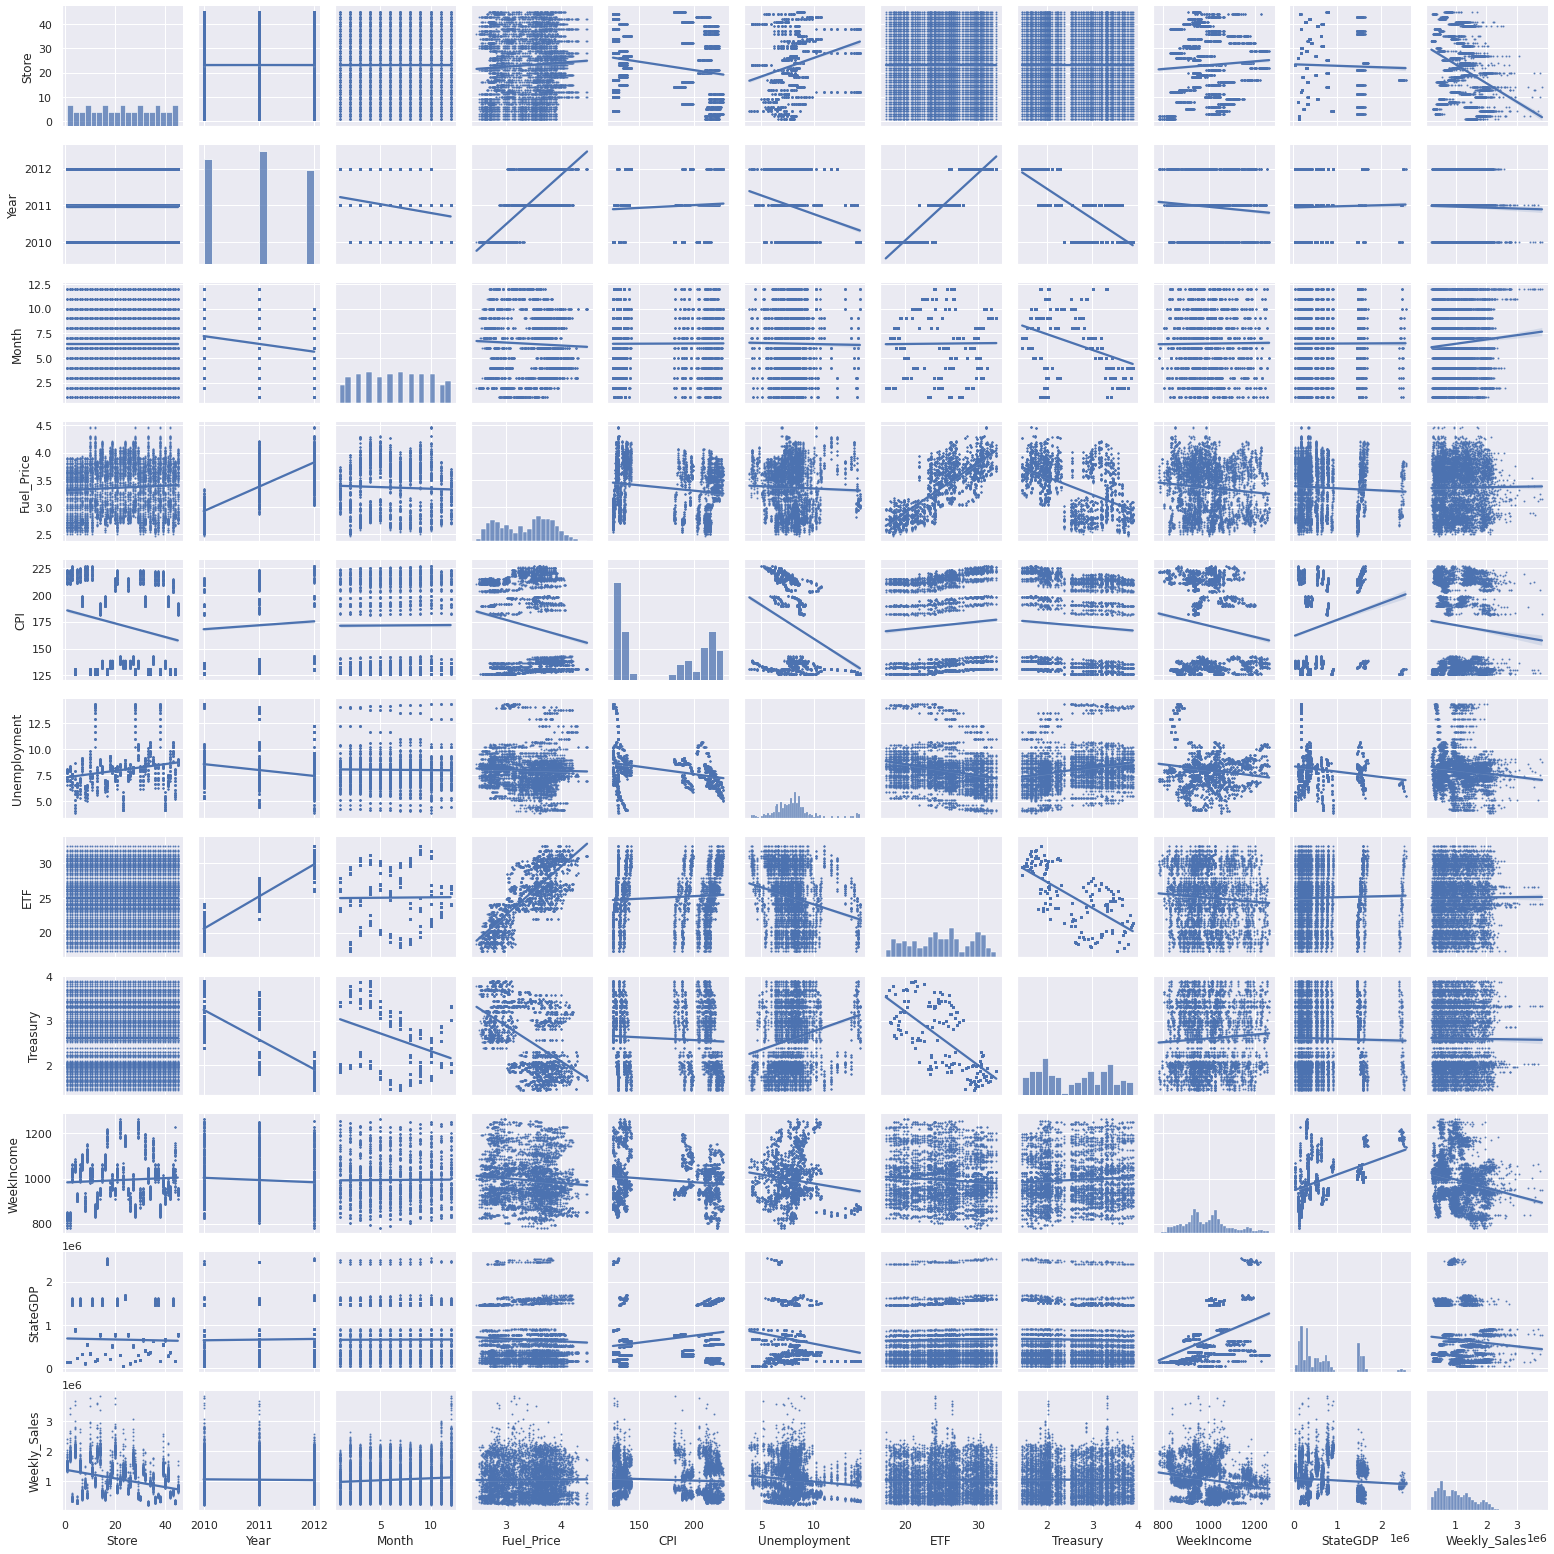

In [ ]:
sns.pairplot(dataset1,
             vars=['Store','Year','Month','Fuel_Price','CPI','Unemployment','ETF','Treasury','WeekIncome','StateGDP','Weekly_Sales'],
             kind='reg',
             plot_kws=dict(scatter_kws=dict(s=1)),
             height=2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


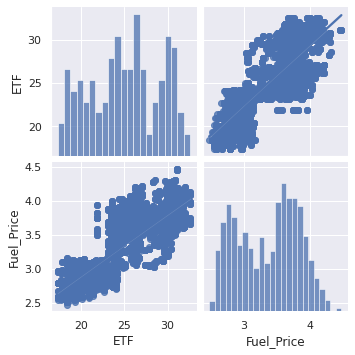

In [ ]:
sns.pairplot(dataset1, vars=['ETF','Fuel_Price'], kind='reg', size=2.5)
plt.show()

- theres seems somewhat multi-colinearity between
  - ETF-FuelPrice, StateGDP-Weekincome (Positive)
  - Treasury-FuelPrice, ETF-Treasury (Negative)
- let me take a look at this further more, using VIF method as below

In [ ]:
from patsy import dmatrices # Preprocessing packages for Regression modeling 
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset1['intercept'] = 1
lm = sm.OLS(dataset1['Weekly_Sales'], dataset1[['Store','Fuel_Price','CPI','Unemployment','ETF','Treasury','WeekIncome','StateGDP']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              3098.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                        0.00
Time:                        06:07:04   Log-Likelihood:                         -94065.
No. Observations:                6435   AIC:                                  1.881e+05
Df Residuals:                    6427   BIC:                                  1.882e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Store        -1.414e+04    540.593    -26.149      0.000   -1.52e+04   -1.31e+04
Fuel_Price    1.502e+05   2.59e+04      5.798      0.000    9.94e+04    2.01e+05
CPI           -471.8942    174.830     -2.699      0.007    -814.619    -129.169
Unemployment  2870.2206   3769.870      0.761      0.446   -4519.981    1.03e+04
ETF           2.089e+04   3388.770      6.165      0.000    1.42e+04    2.75e+04
Treasury      1.613e+05   1.13e+04     14.243      0.000    1.39e+05    1.83e+05
WeekIncome       8.5147     56.992      0.149      0.881    -103.208     120.237
StateGDP        -0.0536      0.013     -4.121      0.000      -0.079      -0.028
==============================================================================
Omnibus:                      174.827   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.657
Skew:                           0.415   Prob(JB):                     1.08e-41
Kurtosis:                       3.123   Cond. No.                     3.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y, X = dmatrices('Weekly_Sales ~ Store + Fuel_Price + CPI + Unemployment + ETF + Treasury + WeekIncome + StateGDP',
                 dataset1,
                 return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,424.265471,Intercept
1,1.088431,Store
2,3.365152,Fuel_Price
3,1.423694,CPI
4,1.296834,Unemployment
5,4.304811,ETF
6,1.841943,Treasury
7,1.348280,WeekIncome
8,1.315688,StateGDP


- VIF Figure at Fuel_Price and ETF seems a little high
- figure 3.36, 4.30 may seem not that serious, but i'm gonna delete ETF feature as below <br> (in general, VIF over 10 means "there's apparent co-dependency")


In [ ]:
dataset1['intercept'] = 1
lm1 = sm.OLS(dataset1['Weekly_Sales'], dataset1[['Store','Fuel_Price','CPI','Unemployment','Treasury','WeekIncome','StateGDP']])
results1 = lm1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              3515.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                        0.00
Time:                        06:11:18   Log-Likelihood:                         -94084.
No. Observations:                6435   AIC:                                  1.882e+05
Df Residuals:                    6428   BIC:                                  1.882e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Store        -1.404e+04    541.915    -25.905      0.000   -1.51e+04    -1.3e+04
Fuel_Price     2.88e+05   1.32e+04     21.877      0.000    2.62e+05    3.14e+05
CPI            -16.5403    158.919     -0.104      0.917    -328.075     294.994
Unemployment   183.2306   3755.359      0.049      0.961   -7178.524    7544.985
Treasury      1.321e+05   1.03e+04     12.805      0.000    1.12e+05    1.52e+05
WeekIncome      90.2475     55.588      1.624      0.105     -18.723     199.218
StateGDP        -0.0590      0.013     -4.528      0.000      -0.085      -0.033
==============================================================================
Omnibus:                      177.286   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.590
Skew:                           0.415   Prob(JB):                     2.49e-42
Kurtosis:                       3.160   Cond. No.                     1.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y, X = dmatrices('Weekly_Sales ~ Store + Fuel_Price + CPI + Unemployment + Treasury + WeekIncome + StateGDP',
                 dataset1,
                 return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,405.037958,Intercept
1,1.087886,Store
2,1.452566,Fuel_Price
3,1.339178,CPI
4,1.251756,Unemployment
5,1.451757,Treasury
6,1.347477,WeekIncome
7,1.315608,StateGDP


- there's litte difference compared to before i delete ETF (and VIF looks much better !)

Text(0, 0.5, '')

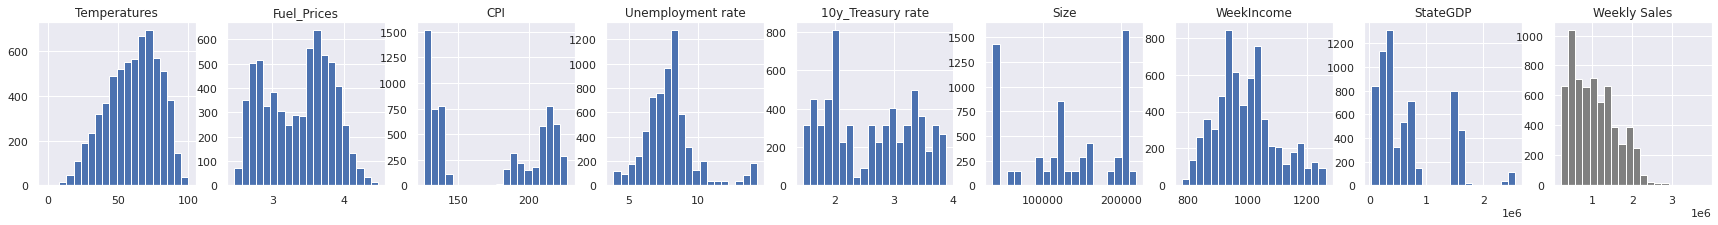

In [ ]:
fig,ax=plt.subplots(1,9,figsize=(30,3))

dataset1['Temperature'].plot.hist(ax=ax[0], bins=20)
ax[0].set_title('Temperatures')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

dataset1['Fuel_Price'].plot.hist(ax=ax[1], bins=20)
ax[1].set_title('Fuel_Prices')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

dataset1['CPI'].plot.hist(ax=ax[2], bins=20)
ax[2].set_title('CPI')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

dataset1['Unemployment'].plot.hist(ax=ax[3], bins=20)
ax[3].set_title('Unemployment rate')
ax[3].set_xlabel('')
ax[3].set_ylabel('')

dataset1['Treasury'].plot.hist(ax=ax[4], bins=20)
ax[4].set_title('10y_Treasury rate')
ax[4].set_xlabel('')
ax[4].set_ylabel('')

dataset1['Size'].plot.hist(ax=ax[5], bins=20)
ax[5].set_title('Size')
ax[5].set_xlabel('')
ax[5].set_ylabel('')

dataset1['WeekIncome'].plot.hist(ax=ax[6], bins=20)
ax[6].set_title('WeekIncome')
ax[6].set_xlabel('')
ax[6].set_ylabel('')

dataset1['StateGDP'].plot.hist(ax=ax[7], bins=20)
ax[7].set_title('StateGDP')
ax[7].set_xlabel('')
ax[7].set_ylabel('')

dataset1['Weekly_Sales'].plot.hist(ax=ax[8], bins=20, color='grey')
ax[8].set_title('Weekly Sales')
ax[8].set_xlabel('')
ax[8].set_ylabel('')

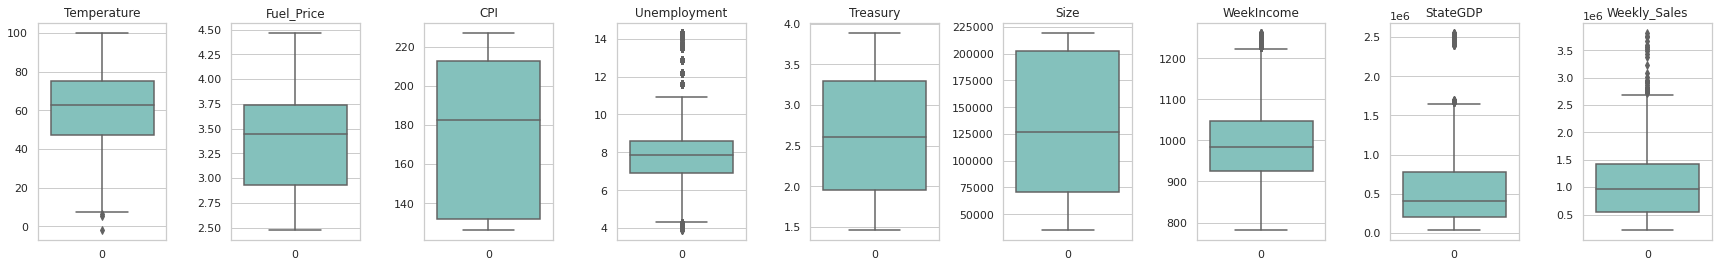

In [ ]:
fig,ax=plt.subplots(1,9,figsize=(30,4))

sns.set_style('whitegrid')
sns.boxplot(data=dataset1['Temperature'], ax=ax[0], palette='GnBu')
sns.boxplot(data=dataset1['Fuel_Price'], ax=ax[1], palette='GnBu')
sns.boxplot(data=dataset1['CPI'], ax=ax[2], palette='GnBu')
sns.boxplot(data=dataset1['Unemployment'], ax=ax[3], palette='GnBu')
sns.boxplot(data=dataset1['Treasury'], ax=ax[4], palette='GnBu')
sns.boxplot(data=dataset1['Size'], ax=ax[5], palette='GnBu')
sns.boxplot(data=dataset1['WeekIncome'], ax=ax[6], palette='GnBu')
sns.boxplot(data=dataset1['StateGDP'], ax=ax[7], palette='GnBu')
sns.boxplot(data=dataset1['Weekly_Sales'], ax=ax[8], palette='GnBu')

ax[0].set_title('Temperature')
ax[1].set_title('Fuel_Price')
ax[2].set_title('CPI')
ax[3].set_title('Unemployment')
ax[4].set_title('Treasury')
ax[5].set_title('Size')
ax[6].set_title('WeekIncome')
ax[7].set_title('StateGDP')
ax[8].set_title('Weekly_Sales')

plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   City          6435 non-null   object 
 2   State         6435 non-null   object 
 3   Year          6435 non-null   int64  
 4   Month         6435 non-null   int64  
 5   Holiday_Flag  6435 non-null   int64  
 6   Temperature   6435 non-null   float64
 7   Fuel_Price    6435 non-null   float64
 8   CPI           6435 non-null   float64
 9   Unemployment  6435 non-null   float64
 10  ETF           6435 non-null   float64
 11  Treasury      6435 non-null   float64
 12  Type          6435 non-null   object 
 13  Size          6435 non-null   int64  
 14  WeekIncome    6435 non-null   float64
 15  StateGDP      6435 non-null   float64
 16  Weekly_Sales  6435 non-null   float64
 17  intercept     6435 non-null   int64  
dtypes: float64(9), int64(6), obj

### * Visualizing Income Level by States (by Folium & google geocoding)

In [ ]:
# create df to show average WeekIncome, StateGDP by States 

states_u = dataset1['State'].unique()
Incomebystate = pd.DataFrame(index=states_u, columns=['WeekIncome_A','StateGDP_A']).sort_index()
Incomebystate['WeekIncome_A'] = dataset1.groupby('State')['WeekIncome'].mean()
Incomebystate['StateGDP_A'] = dataset1.groupby('State')['StateGDP'].mean()

Incomebystate

,WeekIncome_A,StateGDP_A
Alabama,916.398939,2.320940e+05
Arizona,1015.119249,3.323984e+05
Arkansas,824.756342,1.323152e+05
California,1180.523783,2.466752e+06
Colorado,1074.029217,3.214331e+05
Connecticut,1225.076860,2.965994e+05
Georgia,975.522036,5.423239e+05
Illinois,1054.021615,8.833276e+05
Indiana,937.871659,3.670871e+05
Iowa,900.240910,1.927191e+05


In [ ]:
# google api key
gmaps_key = "THIS-KEY-IS-CLASSIFIED"

In [ ]:
gmaps = googlemaps.Client(key=gmaps_key)

In [ ]:
os.getcwd()

'/content/drive/MyDrive'

In [ ]:
"""
states locations(lat&lng) of the United States (json file source): 
https://github.com/PublicaMundi/MappingAPI/blob/master/data/geojson/us-states.json
"""
geo_path = '/content/drive/MyDrive/us_states_geo_simple.json'

In [ ]:
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [ ]:
cities_array = dataset1['City'].unique()
cities_array = np.sort(cities_array)
cities_list = cities_array.tolist()

for i in cities_list : 
  geocode_result = gmaps.geocode(i)
  print(i, [result['geometry']['location'] for result in geocode_result])

Allentown [{'lat': 40.6022939, 'lng': -75.4714098}]
Benton [{'lat': 34.5693083, 'lng': -92.58537799999999}]
Bristol [{'lat': 51.454513, 'lng': -2.58791}]
Catskill [{'lat': 42.0092908, 'lng': -74.3821116}, {'lat': 42.2173102, 'lng': -73.8645734}, {'lat': 42.21460709999999, 'lng': -73.95949399999999}]
Charlottesville [{'lat': 38.0293059, 'lng': -78.47667810000002}]
Comstock park [{'lat': 43.0386368, 'lng': -85.67003319999999}]
Dallas [{'lat': 32.7766642, 'lng': -96.79698789999999}]
Davenport [{'lat': 41.5236437, 'lng': -90.5776367}]
Deming []
Derby [{'lat': 52.9225301, 'lng': -1.4746186}]
Eaton []
El Paso [{'lat': 31.7618778, 'lng': -106.4850217}]
Ellenwood [{'lat': 33.609725, 'lng': -84.2873662}]
Eugene [{'lat': 44.0520691, 'lng': -123.0867536}]
Evansville [{'lat': 37.9715592, 'lng': -87.5710898}]
Fairview []
Frisco [{'lat': 33.1506744, 'lng': -96.82361159999999}]
Gibsonia [{'lat': 40.6300567, 'lng': -79.9703318}]
Houston [{'lat': 29.7604267, 'lng': -95.3698028}]
La Vale [{'lat': 39.655

In [ ]:
cities_list[3] = 'Catskill NY 12414'
cities_list[8] = 'Deming NM'
cities_list[10] = 'Eaton OH'    
cities_list[15] = 'Fairview NM'    
cities_list[22] = 'Livingston AL'    
cities_list[23] = 'Longview TX'    
cities_list[-10] = 'Richmond IN'    
cities_list[-9] = 'Rogers AR'    
cities_list[-7] = 'Savoy IL'  
cities_list[-6] = 'Shelton CT' 
cities_list[-1] = 'Williston VT' 

In [ ]:
for i in cities_list : 
  geocode_result = gmaps.geocode(i)
  print(i, [result['geometry']['location'] for result in geocode_result])

Allentown [{'lat': 40.6022939, 'lng': -75.4714098}]
Benton [{'lat': 34.5693083, 'lng': -92.58537799999999}]
Bristol [{'lat': 51.454513, 'lng': -2.58791}]
Catskill NY 12414 [{'lat': 42.2173102, 'lng': -73.8645734}]
Charlottesville [{'lat': 38.0293059, 'lng': -78.47667810000002}]
Comstock park [{'lat': 43.0386368, 'lng': -85.67003319999999}]
Dallas [{'lat': 32.7766642, 'lng': -96.79698789999999}]
Davenport [{'lat': 41.5236437, 'lng': -90.5776367}]
Deming NM [{'lat': 32.2686981, 'lng': -107.7586404}]
Derby [{'lat': 52.9225301, 'lng': -1.4746186}]
Eaton OH [{'lat': 39.7439405, 'lng': -84.6366201}]
El Paso [{'lat': 31.7618778, 'lng': -106.4850217}]
Ellenwood [{'lat': 33.609725, 'lng': -84.2873662}]
Eugene [{'lat': 44.0520691, 'lng': -123.0867536}]
Evansville [{'lat': 37.9715592, 'lng': -87.5710898}]
Fairview NM [{'lat': 36.0097454, 'lng': -106.0644677}]
Frisco [{'lat': 33.1506744, 'lng': -96.82361159999999}]
Gibsonia [{'lat': 40.6300567, 'lng': -79.9703318}]
Houston [{'lat': 29.7604267, 'ln

In [ ]:
lat_list = []

for i in cities_list : 
  latitude = gmaps.geocode(i)
  lat_list.append([result['geometry']['location']['lat'] for result in latitude])

print(lat_list)

[[40.6022939], [34.5693083], [51.454513], [42.2173102], [38.0293059], [43.0386368], [32.7766642], [41.5236437], [32.2686981], [52.9225301], [39.7439405], [31.7618778], [33.609725], [44.0520691], [37.9715592], [36.0097454], [33.1506744], [40.6300567], [29.7604267], [39.655643], [36.171563], [40.1983884], [32.5843025], [32.5007037], [30.3407629], [30.5782297], [33.4151843], [33.0151205], [40.4172871], [35.4675602], [28.8921939], [30.3058611], [39.8289369], [36.3335129], [40.9040085], [40.054753], [41.3164856], [40.4849769], [40.4162842], [32.2539787], [40.6916132], [44.4454432]]


In [ ]:
lng_list = []

for i in cities_list : 
  longitude = gmaps.geocode(i)
  lng_list.append([result['geometry']['location']['lng'] for result in longitude])

print(lng_list)

[[-75.4714098], [-92.58537799999999], [-2.58791], [-73.8645734], [-78.47667810000002], [-85.67003319999999], [-96.79698789999999], [-90.5776367], [-107.7586404], [-1.4746186], [-84.6366201], [-106.4850217], [-84.2873662], [-123.0867536], [-87.5710898], [-106.0644677], [-96.82361159999999], [-79.9703318], [-95.3698028], [-78.8105755], [-115.1391009], [-83.0100987], [-88.1872475], [-94.74048909999999], [-97.55694559999999], [-98.2729184], [-111.8314724], [-96.6130486], [-82.90712300000001], [-97.5164276], [-99.095033], [-90.9723583], [-84.8902382], [-94.12569529999999], [-74.10073179999999], [-88.2517165], [-73.0931641], [-106.8317158], [-120.6530063], [-110.9741769], [-112.0010501], [-73.099194]]


In [ ]:
lat_list = list(itertools.chain(*lat_list))
lng_list = list(itertools.chain(*lng_list))

print(lat_list)
print(lng_list)

[40.6022939, 34.5693083, 51.454513, 42.2173102, 38.0293059, 43.0386368, 32.7766642, 41.5236437, 32.2686981, 52.9225301, 39.7439405, 31.7618778, 33.609725, 44.0520691, 37.9715592, 36.0097454, 33.1506744, 40.6300567, 29.7604267, 39.655643, 36.171563, 40.1983884, 32.5843025, 32.5007037, 30.3407629, 30.5782297, 33.4151843, 33.0151205, 40.4172871, 35.4675602, 28.8921939, 30.3058611, 39.8289369, 36.3335129, 40.9040085, 40.054753, 41.3164856, 40.4849769, 40.4162842, 32.2539787, 40.6916132, 44.4454432]
[-75.4714098, -92.58537799999999, -2.58791, -73.8645734, -78.47667810000002, -85.67003319999999, -96.79698789999999, -90.5776367, -107.7586404, -1.4746186, -84.6366201, -106.4850217, -84.2873662, -123.0867536, -87.5710898, -106.0644677, -96.82361159999999, -79.9703318, -95.3698028, -78.8105755, -115.1391009, -83.0100987, -88.1872475, -94.74048909999999, -97.55694559999999, -98.2729184, -111.8314724, -96.6130486, -82.90712300000001, -97.5164276, -99.095033, -90.9723583, -84.8902382, -94.125695299

In [ ]:
# create df to show lat & lng of cities where Walmarts are located

walmart_cities = pd.DataFrame(index=cities_list, columns=['lat','lng'])
walmart_cities['lat'] = lat_list
walmart_cities['lng'] = lng_list

walmart_cities.head()

,lat,lng
Allentown,40.602294,-75.471410
Benton,34.569308,-92.585378
Bristol,51.454513,-2.587910
Catskill NY 12414,42.217310,-73.864573
Charlottesville,38.029306,-78.476678


In [ ]:
# map location (center of the US)
gmaps.geocode('United States', language='eng')

[{'address_components': [{'long_name': 'United States',
    'short_name': 'US',
    'types': ['country', 'political']}],
  'formatted_address': 'United States',
  'geometry': {'bounds': {'northeast': {'lat': 71.5388001, 'lng': -66.885417},
    'southwest': {'lat': 18.7763, 'lng': 170.5957}},
   'location': {'lat': 37.09024, 'lng': -95.712891},
   'location_type': 'APPROXIMATE',
   'viewport': {'northeast': {'lat': 49.38, 'lng': -66.94},
    'southwest': {'lat': 25.82, 'lng': -124.39}}},
  'place_id': 'ChIJCzYy5IS16lQRQrfeQ5K5Oxw',
  'types': ['country', 'political']}]

In [ ]:
map = folium.Map(location=[37.09024, -95.712891], 
                 zoom_start=4, 
                 tiles='stamen toner',
                 width=800,
                 height=550)

map.choropleth(geo_data = geo_str,
              data = Incomebystate['WeekIncome_A'],
              columns = [Incomebystate.index, Incomebystate['WeekIncome_A']],
              fill_color = 'PuRd',
              key_on = 'feature.properties.name')

map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
for i in walmart_cities.index:
    folium.Marker(location = [walmart_cities['lat'][i],walmart_cities['lng'][i]]).add_to(map) 
map

## **Dataset Split**

In [ ]:
from sklearn.model_selection import train_test_split

# x and y
x = dataset1.drop(['City','State','ETF','Weekly_Sales','intercept'], axis=1).copy()
y = dataset1['Weekly_Sales'].copy()

# data split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
train_x.head(3)

,Store,Year,Month,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Treasury,Type,Size,WeekIncome,StateGDP
1288,29,2010,8,0,73.21,2.796,132.6616,10.409,2.612,B,93638,1251.232,301823.2
1115,36,2010,7,0,82.60,2.542,209.9959,8.360,2.994,A,39910,1019.217,1470669.0
582,43,2010,4,0,66.91,2.780,202.4312,9.593,3.663,C,41062,1014.081,1457746.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder # for enconding str->number types
from sklearn.preprocessing import MinMaxScaler 

# encoding 
ordinal_encoder = OrdinalEncoder() 
train_x_encoded = ordinal_encoder.fit_transform(train_x)
test_x_encoded = ordinal_encoder.fit_transform(test_x)

# scaling 
minmax_scaler = MinMaxScaler(feature_range=(0,1.))
train_xs = pd.DataFrame(minmax_scaler.fit_transform(train_x_encoded), columns = train_x.columns).copy()
test_xs = pd.DataFrame(minmax_scaler.fit_transform(test_x_encoded), columns = test_x.columns).copy()

In [ ]:
train_xs.head(3)

,Store,Year,Month,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Treasury,Type,Size,WeekIncome,StateGDP
0,0.636364,0.0,0.636364,0.0,0.726549,0.148712,0.092998,0.959770,0.496350,0.5,0.230769,0.996341,0.434783
1,0.795455,0.0,0.545455,0.0,0.878851,0.005855,0.471007,0.709770,0.635036,0.0,0.076923,0.598780,0.889632
2,0.954545,0.0,0.272727,0.0,0.603669,0.135831,0.381838,0.916667,0.927007,1.0,0.102564,0.591463,0.886288


## **Modeling**

### 1) fitting in simple linear regression model

In [ ]:
# 1. fitting in simple linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_xs, train_y)

LinearRegression()

In [ ]:
#print("Coefficients :", lm.coef_)
lr.coef_

array([-433354.41371206,  353372.99407219,  334129.63550876,
         56470.10521526,   47424.19286436, -222738.00272196,
       -368653.96362863,  -13012.44249867,  295609.48041994,
         95239.45808154, 1395930.79940976, -161626.00937532,
         55215.77567021])

In [ ]:
lr_pred = lr.predict(test_xs)

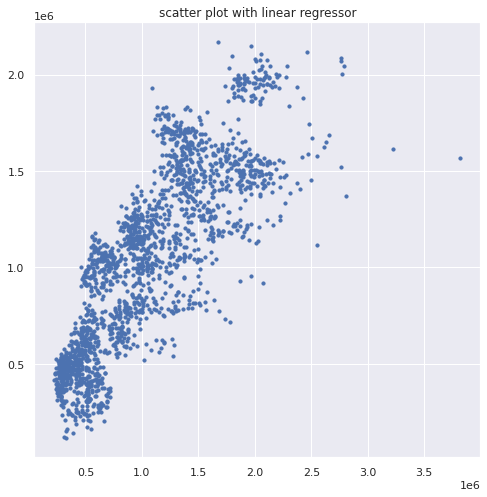

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(test_y, lr_pred, s=10)
plt.title('scatter plot with linear regressor')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(f'R2 : {r2_score(test_y, lr_pred)}')
print(f'MSE : {mean_squared_error(test_y, lr_pred)}')
print(f'RMSE : {mean_squared_error(test_y, lr_pred)**0.5}')

R2 : 0.6814847629643337
MSE : 99506607276.42719
RMSE : 315446.6789751117


- simple linear regression shows statistically too low r2 score.

### 2) fitting in Regularized model (Ridge, Lasso)

In [ ]:
# 2. Regularized model (Ridge, Lasso) 

from sklearn.linear_model import Lasso, Ridge

In [ ]:
ridge = Ridge(alpha=10)
ridge.fit(train_xs, train_y)

Ridge(alpha=10)

In [ ]:
ridge.intercept_, ridge.coef_

(529019.159519986, array([-418884.06592372,  219017.46654123,  258722.16621705,
          53181.37177552,   16975.47523877, -132197.17906644,
        -332361.62622964,  -14438.2887211 ,  170430.55741928,
          40307.53102249, 1318837.31150749, -158134.7322835 ,
          51949.24142041]))

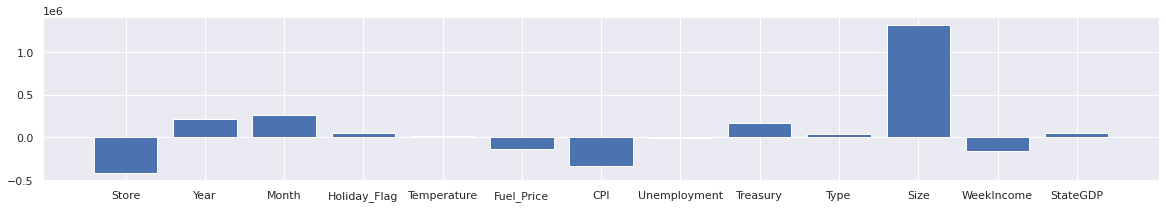

In [ ]:
plt.figure(figsize=(20, 3))
plt.bar(train_xs.columns, ridge.coef_) # x, y
plt.show()

In [ ]:
  ridge_pred = ridge.predict(test_xs)

In [ ]:
print(f'R2 : {r2_score(test_y, ridge_pred)}')
print(f'MSE : {mean_squared_error(test_y, ridge_pred)}')
print(f'RMSE : {mean_squared_error(test_y, ridge_pred)**0.5}')

R2 : 0.6818729887198409
MSE : 99385322567.5782
RMSE : 315254.3775549805


- ridge model also show too low r2 score.

### 3) fitting in ensembe model (3-1. xgboost regressor)

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import plot_importance
from xgboost import XGBRegressor

In [ ]:
xgbr = XGBRegressor(random_state=42)
xgbr.fit(train_xs, train_y)

[07:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

In [ ]:
xgbr_pred = xgbr.predict(test_xs)

In [ ]:
print(f'R2 : {r2_score(test_y, xgbr_pred)}')
print(f'MSE : {mean_squared_error(test_y, xgbr_pred)}')
print(f'RMSE : {mean_squared_error(test_y, xgbr_pred)**0,5}')

R2 : 0.9506924411518485
MSE : 15404060225.58013
RMSE : (1.0, 5)


### hyperparameters tuning for xgboost

In [ ]:
xgbr.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 200, 400],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'min_child_weight': [0, 1],
    'gamma': [0, 1],
    'random_state' : [42]
} 
grid_search = GridSearchCV(estimator = XGBRegressor(), param_grid = param_grid, n_jobs = -1)

# Fitting
grid_search.fit(train_xs, train_y)

[08:13:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'gamma': [0, 1], 'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5], 'min_child_weight': [0, 1],
                         'n_estimators': [100, 200, 400],
                         'random_state': [42]})

In [ ]:
print("Best Parameters : \n", grid_search.best_params_)
print("Best Scroe : \n",grid_search.best_score_)

Best Parameters : 
 {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 0, 'n_estimators': 400, 'random_state': 42}
Best Scroe : 
 0.9800755554872314


- after tuned

In [ ]:
xgbr_t = XGBRegressor(gamma=0,
                      learning_rate=0.1,
                      max_depth=5,
                      min_child_weight=0,
                      n_estimators=400,
                      random_state=42)
xgbr_t.fit(train_xs, train_y)
xgbr_t_pred = xgbr_t.predict(test_xs)

print(f'R2 : {r2_score(test_y, xgbr_t_pred)}')
print(f'MSE : {mean_squared_error(test_y, xgbr_t_pred)}')
print(f'RMSE : {mean_squared_error(test_y, xgbr_t_pred)**0,5}')

[08:14:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 : 0.9785576242512215
MSE : 6698762930.667498
RMSE : (1.0, 5)


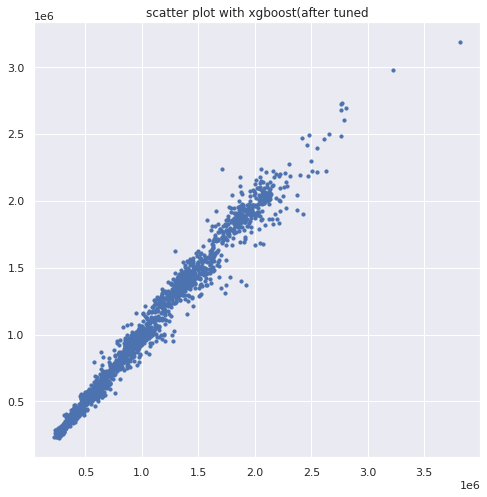

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(test_y, xgbr_t_pred, s=10)
plt.title('scatter plot with xgboost(after tuned')
plt.show()

### 3) fitting in ensemble model (3-2. random forest regressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 42)
rfr.fit(train_xs, train_y)

RandomForestRegressor(random_state=42)

In [ ]:
rfr_pred = rfr.predict(test_xs)

In [ ]:
print(f'R2 : {r2_score(test_y, rfr_pred)}')
print(f'MSE : {mean_squared_error(test_y, rfr_pred)}')
print(f'RMSE : {mean_squared_error(test_y, rfr_pred)**0,5}')

R2 : 0.9347414598503457
MSE : 20387269339.26074
RMSE : (1.0, 5)


### hyperparameters tuning for random forest

In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid2 = {
    'n_estimators' : [100, 200, 400],
    'max_depth': [3, 5],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 4],
    'random_state' : [42]    
} 
grid_search2 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid2, n_jobs = -1)

# Fitting
grid_search2.fit(train_xs, train_y)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 400],
                         'random_state': [42]})

In [ ]:
print("Best Parameters : \n", grid_search2.best_params_)
print("Best Scroe : \n",grid_search2.best_score_)

Best Parameters : 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400, 'random_state': 42}
Best Scroe : 
 0.919124931737548


- after tuned

In [ ]:
rfr_t = RandomForestRegressor(max_depth=5,
                              min_samples_leaf=3,
                              min_samples_split=2,
                              n_estimators=400,
                              random_state=42)
rfr_t.fit(train_xs, train_y)
rfr_t_pred = rfr_t.predict(test_xs)

print(f'R2 : {r2_score(test_y, rfr_t_pred)}')
print(f'MSE : {mean_squared_error(test_y, rfr_t_pred)}')
print(f'RMSE : {mean_squared_error(test_y, rfr_t_pred)**0,5}')

R2 : 0.9096508025629172
MSE : 28225783453.19622
RMSE : (1.0, 5)


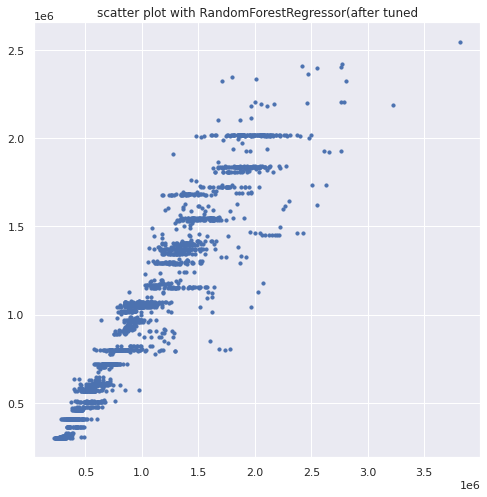

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(test_y, rfr_t_pred, s=10)
plt.title('scatter plot with RandomForestRegressor(after tuned')
plt.show()

In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### 3) fitting in ensemble model (3-3.Adaboost)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adar = AdaBoostRegressor(random_state=42)
adar.fit(train_xs,train_y)

AdaBoostRegressor(random_state=42)

In [ ]:
adar_pred = adar.predict(test_xs)

In [ ]:
print(f'R2 : {r2_score(test_y, adar_pred)}')
print(f'MSE : {mean_squared_error(test_y, adar_pred)}')
print(f'RMSE : {mean_squared_error(test_y, adar_pred)**0,5}')

R2 : 0.7791726821518983
MSE : 68988150763.27815
RMSE : (1.0, 5)


### hyperparameters tuning for adaboost

In [ ]:
adar.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

In [ ]:
param_grid3 = {
    'n_estimators' : [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1],
    'random_state' : [42]    
} 
grid_search3 = GridSearchCV(estimator = AdaBoostRegressor(), param_grid = param_grid3, n_jobs = -1)

# Fitting
grid_search3.fit(train_xs, train_y)

GridSearchCV(estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200], 'random_state': [42]})

In [ ]:
print("Best Parameters : \n", grid_search3.best_params_)
print("Best Scroe : \n",grid_search3.best_score_)

Best Parameters : 
 {'learning_rate': 0.5, 'n_estimators': 50, 'random_state': 42}
Best Scroe : 
 0.8188330568448347


- after tuned

In [ ]:
adar_t = AdaBoostRegressor(learning_rate=0.5,
                           n_estimators=50,
                           random_state=42)
adar_t.fit(train_xs, train_y)
adar_t_pred = adar_t.predict(test_xs)

print(f'R2 : {r2_score(test_y, adar_t_pred)}')
print(f'MSE : {mean_squared_error(test_y, adar_t_pred)}')
print(f'RMSE : {mean_squared_error(test_y, adar_t_pred)**0,5}')

R2 : 0.8073947247336071
MSE : 60171367824.24958
RMSE : (1.0, 5)


## **Selected Model** : xgbr_t (XGBRegressor after tuned)

- model info : 
XGBRegressor
                      gamma=0,
                      learning_rate=0.1,
                      max_depth=5,
                      min_child_weight=0,
                      n_estimators=400,
                      random_state=42

- model score : R2 : 0.9785576242512215 / MSE : 6698762930.667498 / RMSE : (1.0, 5)
